<a href="https://colab.research.google.com/github/Leonel-Jeffrey/COMP-1827/blob/main/Convolutional_Neural_Networks_with_Keras_lab_with_solutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Convolutional Neural Network with Keras (Part 1) 

**What is Keras?** Keras is a wrapper that allows you to implement Deep Neural Networks without getting into intrinsic details of the Network. It can use *Tensorflow* or *Theano* as backend. 


In this lab you will build a **CNN** (comprised of convolutional layers, pooling layers and fully connected ones) for image classification (classify whether an image contains an airplane or automobile or bird or cat or deer or dog or frog or horse or ship or truck).

# Importing libraries

In [ ]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

import numpy as np

%matplotlib inline

# Importing Dataset

Here we are loading the cifar10 Dataset which is preloaded in tensorflow. <br>

Calling the `load_data` function on this object returns splitted train and test data in form of (features, target).

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

170508288/170498071 [==============================] - 11s 0us/step


# Overview of Dataset

The CIFAR10 dataset contains 60,000 (32 x 32 pixel) color images in 10 classes, with 6,000 images in each class. The dataset is divided into 50,000 training images and 10,000 testing images. The classes are mutually exclusive and there is no overlap between them.<br>
>The shape (50000, 32, 32, 3) represents **50000** images each of dimension **32 x 32 x 3**.<br>
The shape **(50000, )** represents (50000, 1) shape i.e. 50000 labels, each for one image.

In [ ]:
print(f'Shape of the training data: {train_images.shape}')
print(f'Shape of the training target: {train_labels.shape}')
print(f'Shape of the test data: {test_images.shape}')
print(f'Shape of the test target: {test_labels.shape}')

Shape of the training data: (50000, 32, 32, 3)
Shape of the training target: (50000, 1)
Shape of the test data: (10000, 32, 32, 3)
Shape of the test target: (10000, 1)


In [ ]:
print(train_labels)

[[6]
 [9]
 [9]
 ...
 [9]
 [1]
 [1]]


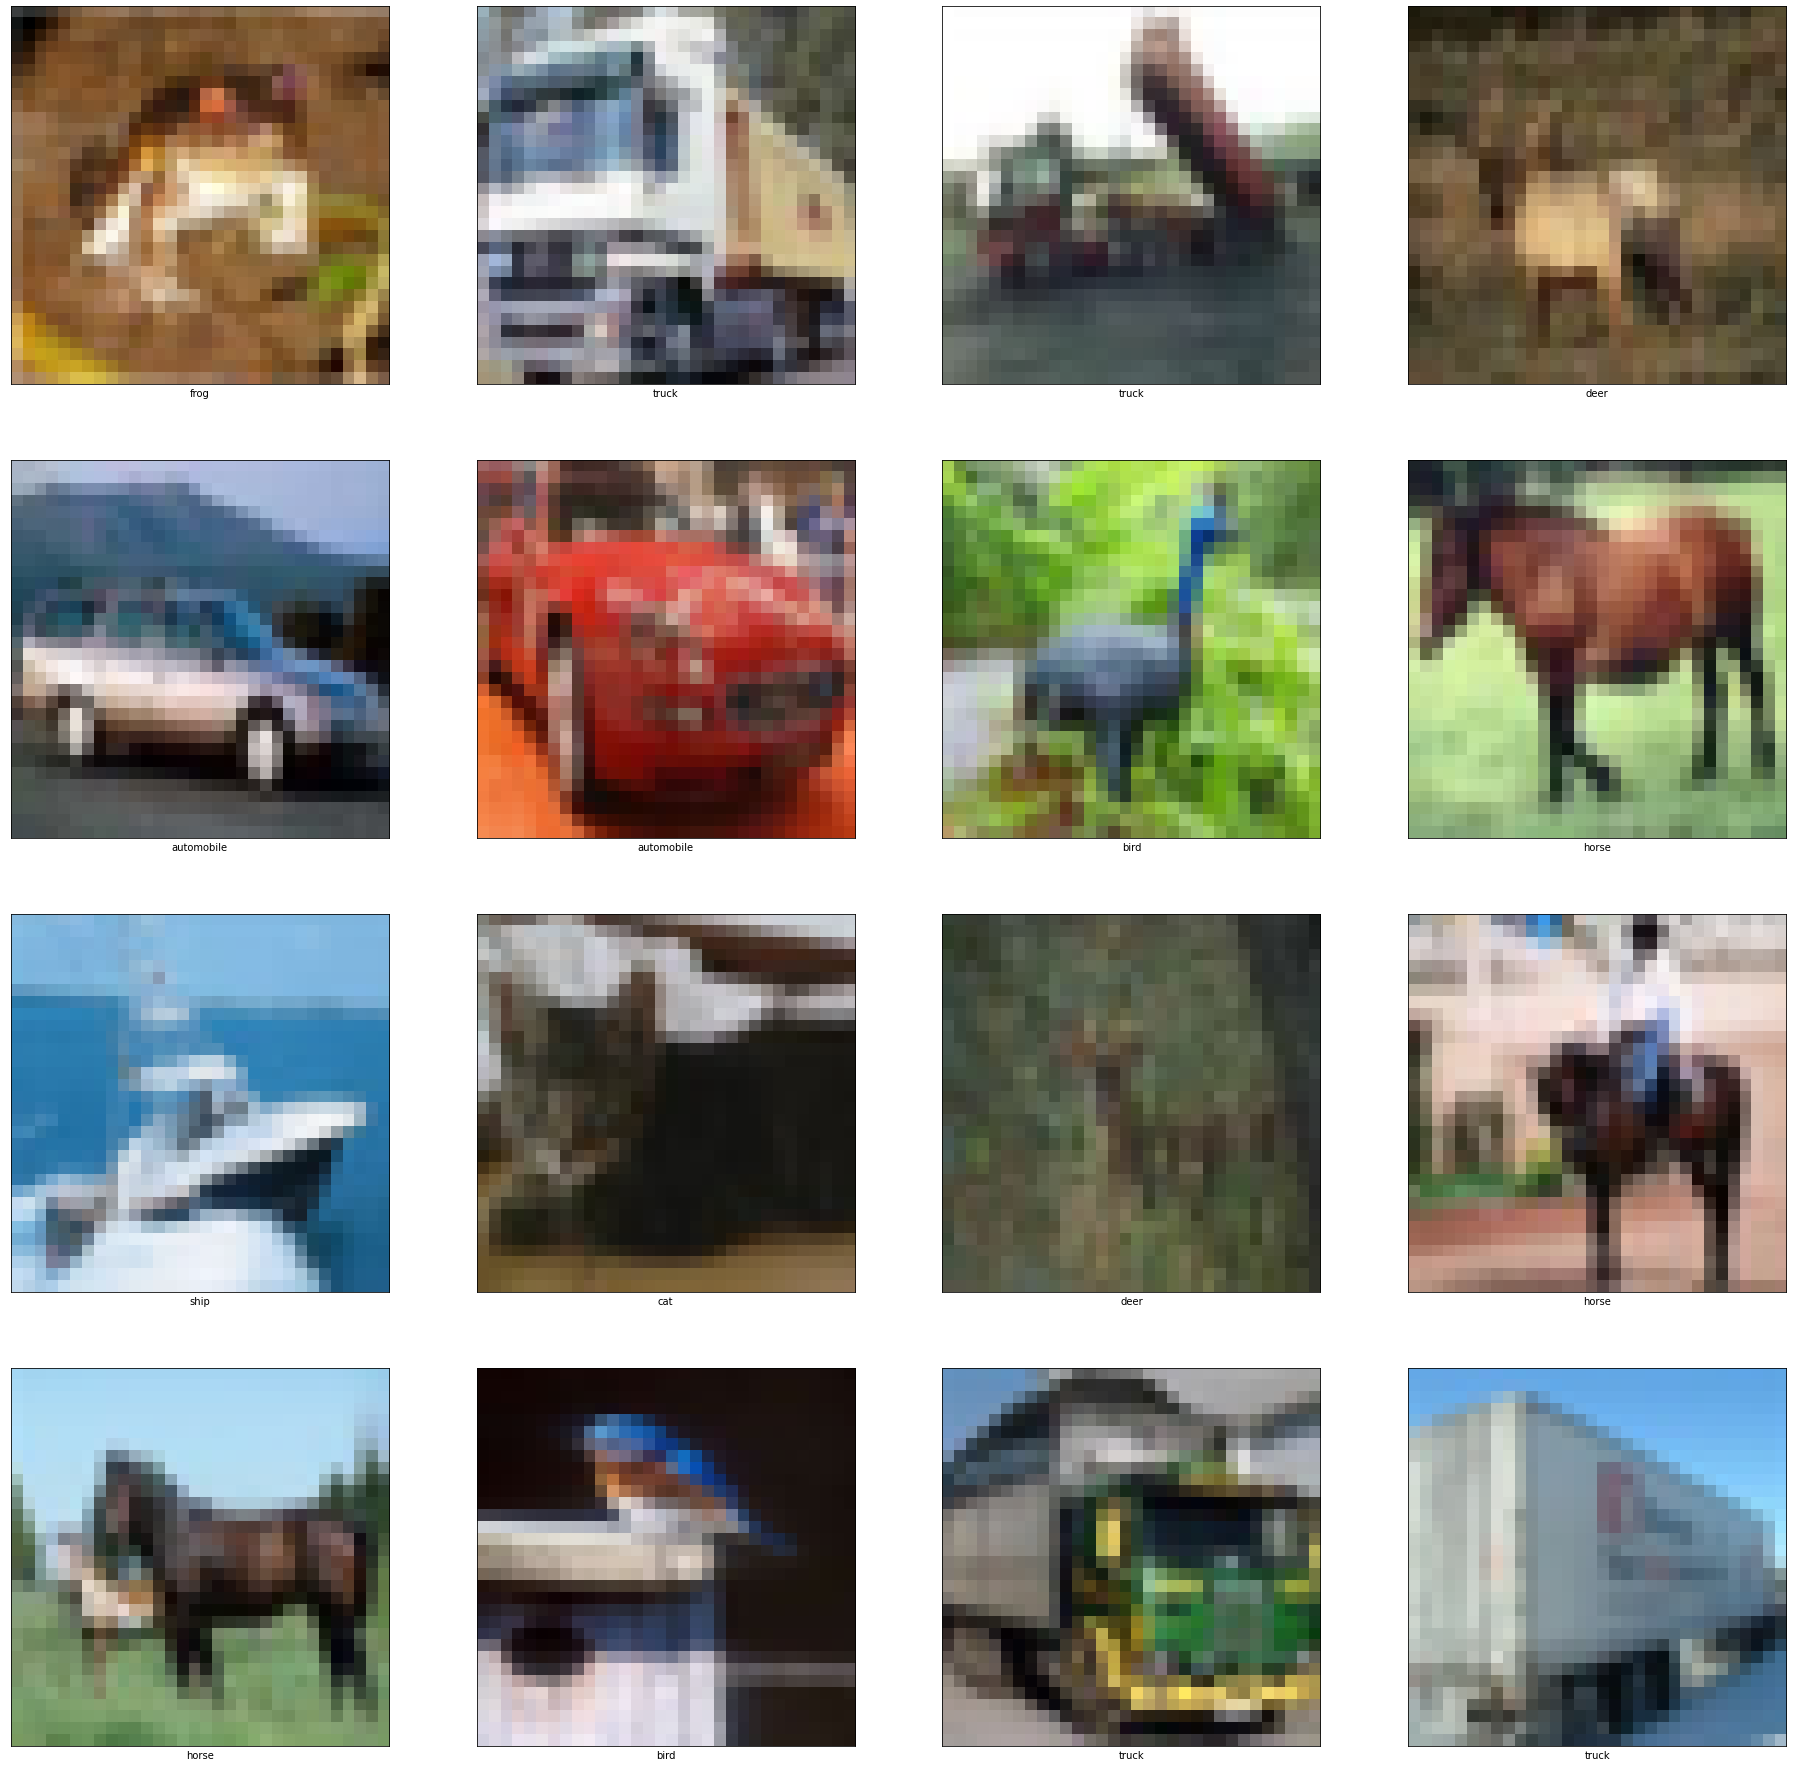

In [ ]:
# To verify that the dataset looks correct, let's plot the first 16 images from the training set and display the class name below each image.
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(32,32))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

# Preprocessing

Normalizing i.e. scaling the pixels to 0-1 from 0-255.

In [ ]:
# Normalizing
train_images, test_images = train_images / 255.0, test_images / 255.0

# Modelling

There are two types of models in Tensorflow:
 - **Sequential**
 - **Graphical**

## Models
`tf.keras.model.Sequential()` 
lets you create a linear stack of layers providing a Sequential netural network.<br>
`tf.model()`
allows you to create arbitarary graph of layers as long as there is no cycle.

## Convolution Layer
`tf.keras.layers.Conv2D()` Convolution layer takes the following argument
> * **filters** Number of different types of convolutions used. Initially they are set to some predefined convolution and slowly trained to find better features in the image.
* **kernel_size** An integer or tuple/list of 2 integers, specifying the height and width of the 2D convolution window. Can be a single integer to specify the same value for all spatial dimensions.
* **strides** An integer or tuple/list of 2 integers, specifying the strides of the convolution along the height and width. Can be a single integer to specify the same value for all spatial dimensions. Default value is (1,1)
* **padding** One of "valid" or "same" (case-insensitive): <br>
 VALID Padding: it means no padding and it assumes that all the dimensions are valid so that the input image gets fully covered by a filter and the stride specified by you. <br>
 SAME Padding: it applies padding to the input image so that the input image gets fully covered by the filter and specified stride. It is called SAME because, for stride 1 , the output will be the same as the input. 
* **activation** activation function. Default value is: None
* **use_bias** Boolean, whether the layer uses a bias vector. Default value is: True
* **input_shape** Size of each input to the convolution.

## Pooling
`tf.keras.layers.MaxPooling2D()` Max Pooling layer to reduce the size of the input. This layer takes the following arguments:
> * **pool_size** Dimension of pooling kernel. Default value is (2, 2)
* **strides** Integer, tuple of 2 integers, or None. Strides values. Specifies how far the pooling window moves for each pooling step. Default value is: None
* **padding** One of "valid" or "same" (case-insensitive). "valid" adds no zero padding. "same" adds padding such that if the stride is 1, the output shape is the same as input shape. Default value is "valid".<br>
`tf.keras.layers.AveragePooling2D()` Average Pooling layer to reduce the size of the input.


## Flatten Layer
`tf.keras.layers.Flatten()` flattens the input.<br>
For input of `(batch_size, height, width, depth)` the output converts to `(batch_size, height * width * depth)`

## Dense Layer
`tf.keras.layers.Dense()` Normal dense layer (= fully connected layer): each node/neuron in this layer is connected to each node in the input layer. <br>
>The two arguments passes below in dense layer are *units* and *activation* (activation function).<br>
* **units** corresponds to the number of nodes in the layer<br>
* **activation** is an element-wise activation function.
    * **relu**: This activation function converts every negative value to 0 and positive remains the same
    * **softmax**: This function takes as input a vector of K real numbers, and normalizes it into a probability distribution consisting of K probabilities proportional to the exponentials of the input numbers.


## Compiling model
`model.compile()` Sets up the optimiser, loss and metrics configuration.
> * **optimizer**: updates the parameter of the Neural Network.
* **loss**: Measures the error in our model.
* **metrics**: Used to judge the model. The difference between metrics and loss is that metrics in not used to evaluate the model while training, whereas loss evaluates the model error while training and helps optimizer reduce the error.

# Creating the Model-Architecture

As input, a CNN takes tensors of shape (image_height, image_width, color_channels), ignoring the batch size; color_channels refer to (R,G,B). 
In this example, we will configure our CNN to process inputs of shape (32, 32, 3), which is the format of CIFAR images. We can do this by passing the argument input_shape to our first layer.
**Note** We only pass the argument input_shape to the first layer of the architecture (in our case it is the conv layer with 3x3 filter and 32 output feature maps). We do *not have to* pass it to any other layer (if you want to pass it, you need to make sure that the dimensions that you pass are correct else it will result in error; the dimensions in that case are not 32x32x3)

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))

##########
# Step 1i: Add one more 2d conv layer with 3x3 filter and 64 feature maps 
# Step 1ii: Add one 2d max pooling layer with 2x2 filter  
# Step 3: Add the output layer: should be a fully connected one with softmax as activation function. 
# How many outputs/neurons should the output layer have?
# Step 2 is missing for a reason!
##########

# Step 1i
model.add(layers.Conv2D(64, (3, 3), activation='relu'))   
# or if you want to pass the input_shape argument, the previous command should be:
# model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(15, 15, 32)))  # the 15x15x32 is the output shape of the previous/max-pooing layer

# Step 1ii
model.add(layers.MaxPooling2D((2, 2)))

# (Missing) Step 2
# the previous (pooling) layer gave an output feature map of size: 6x6x64
# we need to flatten this feature map/'image' into a vector first so that it could fit to a fully connected (dense) layer
model.add(layers.Flatten())   # no arguments are needed in the Flatten

# Step 3: the output layer should have 10 neurons since this is the total number of classes in the cifar10 dataset
model.add(layers.Dense(10, activation="softmax"))

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])



## Model details

Let's look at details of the model.


In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 2304)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                23050     
Total params: 42,442
Trainable params: 42,442
Non-trainable params: 0
__________________________________________________

## Training

```model.fit``` trains the model.
> * **train_images**: Training data/features
* **train_labels**: Target
* **epochs**: Number of times the entire dataset is fed in the model



Epoch 1/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.5164 - accuracy: 0.4598 - val_loss: 1.2815 - val_accuracy: 0.5438
Epoch 2/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.1675 - accuracy: 0.5955 - val_loss: 1.1235 - val_accuracy: 0.6130
Epoch 3/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0444 - accuracy: 0.6416 - val_loss: 1.0478 - val_accuracy: 0.6404
Epoch 4/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9726 - accuracy: 0.6657 - val_loss: 1.0246 - val_accuracy: 0.6497
Epoch 5/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9222 - accuracy: 0.6822 - val_loss: 0.9824 - val_accuracy: 0.6608
Epoch 6/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8809 - accuracy: 0.6993 - val_loss: 0.9642 - val_accuracy: 0.6669
Epoch 7/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8505 - accuracy: 0.7079 - val_loss: 1.0178 - val_accuracy:

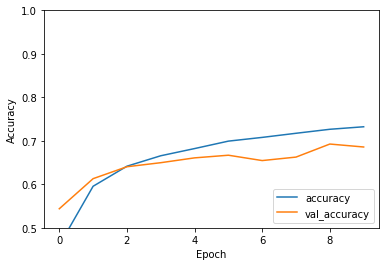

In [ ]:
# Training
history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

# Validation
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print(test_acc)

## Visualize prediction

Now let's visualize the prediction using the model you just trained. 
First we get the predictions with the model from the test data.
Then we print out 15 images from the test data set, and set the titles with the prediction (and the ground truth label).
If the prediction matches the true label, the title will be green; otherwise it's displayed in red.

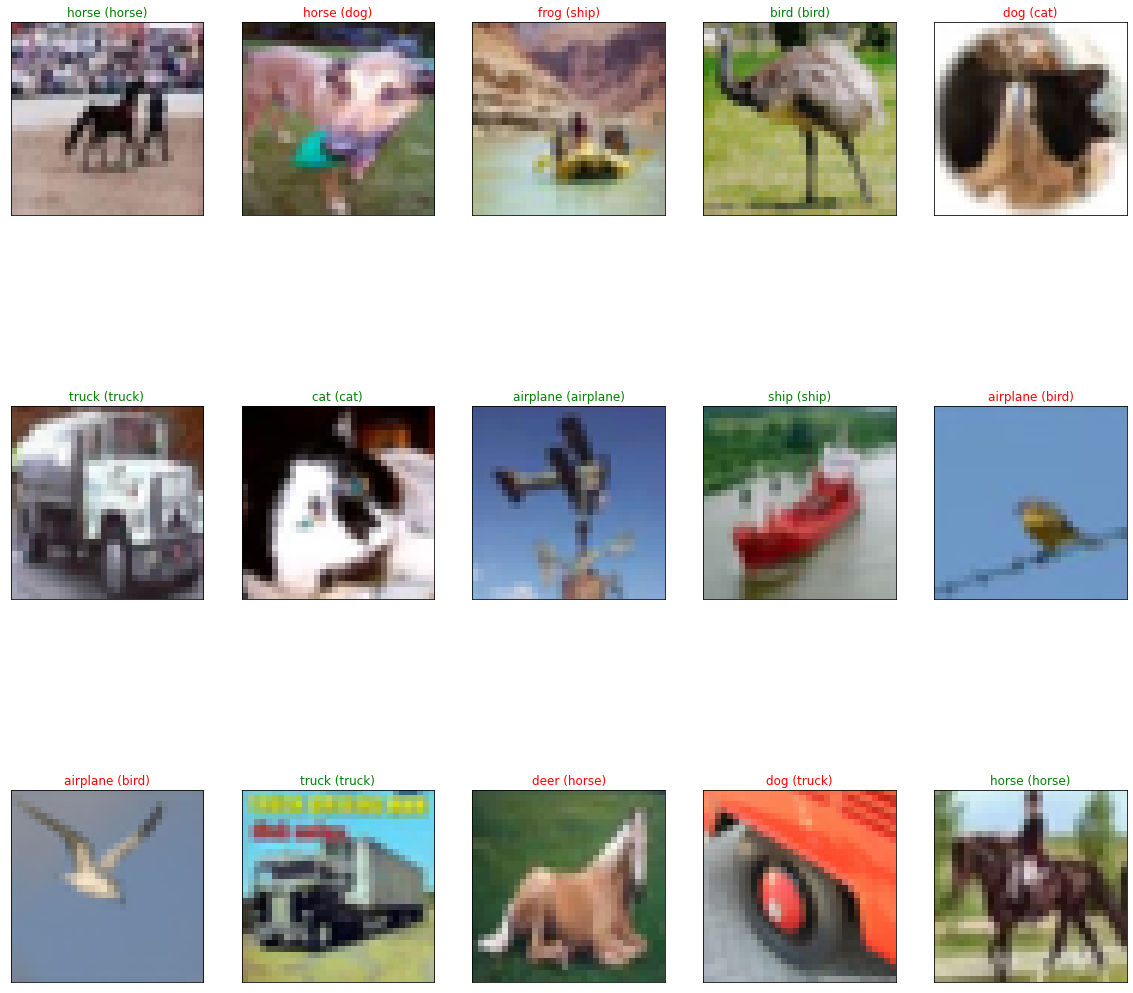

In [ ]:
import pdb
y_hat = model.predict(test_images)

# Plot a random sample of 15 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 20))
for i, index in enumerate(np.random.choice(test_images.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(test_images[index]))
    predict_index = np.argmax(y_hat[index])
    true_index = test_labels[index][0]
    # Set the title for each image
    ax.set_title("{} ({})".format(class_names[predict_index], 
                                  class_names[true_index]),
                                  color=("green" if predict_index == true_index else "red"))

# Visualising feature maps

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10_input (InputLayer) [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 30, 30, 32)        896       
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________


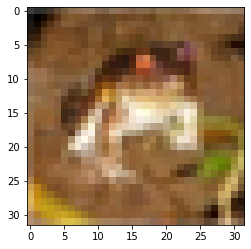

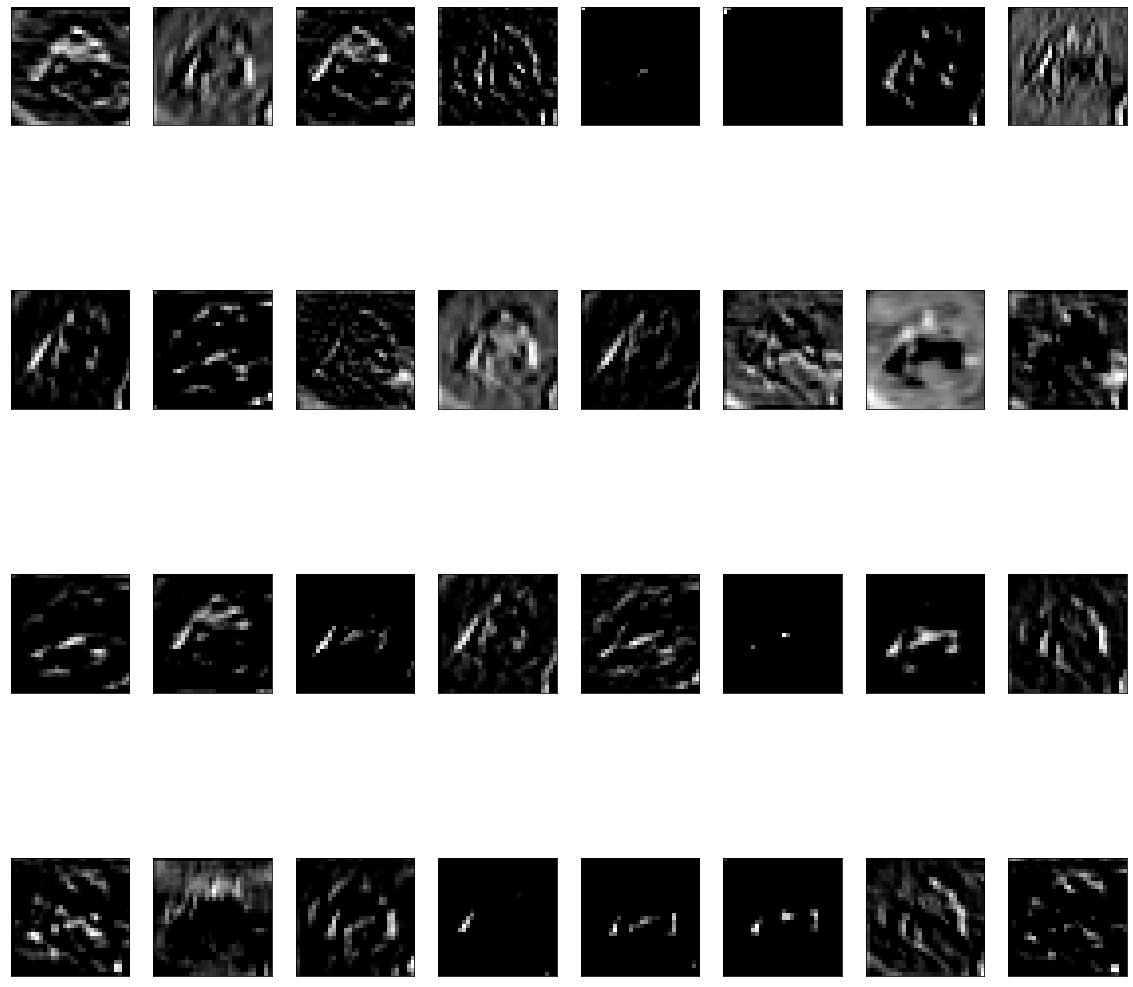

In [ ]:
from numpy import expand_dims
from keras.models import Model

# redefine model to output right after the first conv layer
model1 = Model(inputs=model.inputs, outputs=model.layers[0].output)
model1.summary()
# load the image with the required shape
img = train_images[0]
# expand dimensions so that it represents a single 'sample'
img = expand_dims(img, axis=0)
# get feature map for first conv layer
feature_maps = model1.predict(img)
# plot all 32 maps in 4x8 squares
square1 = 4
square2 = 8
ix = 1

# Display the input image
plt.imshow(img[0])


figure = plt.figure(figsize=(20, 20))
for _ in range(square1):
	for _ in range(square2):
		ax = figure.add_subplot(square1, square2, ix, xticks=[], yticks=[])
    # Display each image
		# plot filter channel in grayscale
		ax.imshow(feature_maps[0, :, :, ix-1], cmap='gray')
		ix += 1
# show the figure
plt.show()

## Try the following

0) Fill in the required code (steps 1-3) as indicated in the "Creating the Model-Architecture" Section<br>
1) Add another 2d conv layer with 3x3 filters and 64 output feature maps<br>
2) Check and compare: i) test accuracy, ii) feature maps, between the developed model of (1) and the model of (0) <br>
3) Add one fully connected layer with 64 units on top of the last conv layer of the model of (1) <br>
4) Check and compare: i) test accuracy, ii) feature maps, between all developed models (of (0), of (1), of (3) )<br>
5) Visualise features maps of other conv layers and of more input images<br>
6) Try average pooling instead of max pooling and compare test accuracy<br>
7) Create/define a MLP model with 2 fully connected layers of 64 units each <br>
8) Check its test accuracy and also see the difference in the number of parameters and training time<br>
9) Modify the model of (3) so as to include another fully connected layer with 64 units <br>
10) If it is overfitting or the accuracy does not increase a lot, add regularization and check i) test accuracy, ii) feature maps<br>
11) Add more conv and pooling layers, one by one (you can even stack multiple conv layers on top of each other before using a pooling layer) <br>
12) Check i) test accuracy, ii) feature maps<br>
13) Try training for more epochs<br>

Note for checking and comparing the test accuracies: <br>
either save figures <br>
or save/load model weights of each run (use commands: model.save_weights('CNN.h5'); model.load_weights('CNN.h5') ) and evaluate




In [ ]:
# Creating the Model-Architecture when doing (1) from the 'Try the following': Add another 2d conv layer with 3x3 filters and 64 output feature maps

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
# Step 1i
model.add(layers.Conv2D(64, (3, 3), activation='relu'))   
# Step 1ii
model.add(layers.MaxPooling2D((2, 2)))

########## You need to add this
model.add(layers.Conv2D(64, (3, 3), activation='relu'))   
##########

# (Missing) Step 2
model.add(layers.Flatten())   # no arguments are needed in the Flatten

# Step 3: the output layer should have 10 neurons since this is the total number of classes in the cifar10 dataset
model.add(layers.Dense(10, activation="softmax"))

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])


model.summary()



Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten_4 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)               

In [ ]:
# Creating the Model-Architecture when doing (3) from the 'Try the following': 3) Add one fully connected layer with 64 units on top of the last conv layer of the model of (1)

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
# Step 1i
model.add(layers.Conv2D(64, (3, 3), activation='relu'))   
# Step 1ii
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))   

# (Missing) Step 2
model.add(layers.Flatten())   # no arguments are needed in the Flatten


########## You need to add this
model.add(layers.Dense(64, activation="relu"))
##########

# Step 3: the output layer should have 10 neurons since this is the total number of classes in the cifar10 dataset
model.add(layers.Dense(10, activation="softmax"))

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])


model.summary()



Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten_3 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)               

In [ ]:
# Creating the Model-Architecture when doing (3) from the 'Try the following': 3) Add one fully connected layer with 64 units on top of the last conv layer of the model of (1)

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
# Step 1i
model.add(layers.Conv2D(64, (3, 3), activation='relu'))   
# Step 1ii
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))   

# (Missing) Step 2
model.add(layers.Flatten())   # no arguments are needed in the Flatten


########## You need to add this
model.add(layers.Dense(64, activation="relu"))
##########

# Step 3: the output layer should have 10 neurons since this is the total number of classes in the cifar10 dataset
model.add(layers.Dense(10, activation="softmax"))

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])


model.summary()



Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten_3 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)               